# Clasificación de imágenes usando CNN
### Ejemplo de Entrenamiento
 * Chequeamos que SO estamos utilizando.
 * El ! adelante de los comandos indica que en vez de ejecutar código python, vamos a ejecutar un comando del sistema operativo.

In [1]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


 * Montamos nuestro drive en Colab (para poder acceder a los archivos donde vamos a colocar las imagenes para entrenar la neuronas).
 * Nos va a pedir una contraseña api que se obtiene al abrirse automaticamente una nueva pestaña.


In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


 * Importamos las librerías que vamos a utilizar

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 * Descomprimimos nuestro dataset.

In [18]:
!unzip "/content/drive/My Drive/colab/dataset3.zip"

Archive:  /content/drive/My Drive/colab/dataset4.zip
   creating: dataset4/
   creating: dataset4/test/
   creating: dataset4/test/limon/
  inflating: dataset4/test/limon/limon (110).jpg  
  inflating: dataset4/test/limon/limon (111).jpg  
  inflating: dataset4/test/limon/limon (112).jpg  
  inflating: dataset4/test/limon/limon (113).jpg  
  inflating: dataset4/test/limon/limon (114).jpg  
  inflating: dataset4/test/limon/limon (115).jpg  
  inflating: dataset4/test/limon/limon (116).jpg  
  inflating: dataset4/test/limon/limon (117).jpg  
  inflating: dataset4/test/limon/limon (118).jpg  
  inflating: dataset4/test/limon/limon (119).jpg  
  inflating: dataset4/test/limon/limon (120).jpg  
   creating: dataset4/test/manzana/
  inflating: dataset4/test/manzana/manzana (102).jpg  
  inflating: dataset4/test/manzana/manzana (103).jpg  
  inflating: dataset4/test/manzana/manzana (104).jpg  
  inflating: dataset4/test/manzana/manzana (105).jpg  
  inflating: dataset4/test/manzana/manzana (1

 * Creamos la clase que usaremos para crear los datasets.
 * Creamos el conjunto de entrenamiento y el de test.

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,   
shear_range = 0.2,
zoom_range = 0.2)                                                             #Creamos un objeto del tipo imagedatagenerator para las imagenes de entrenamiento
                                                                              #configurando la escala, el zoom y el estiramiento de las imagenes

test_datagen = ImageDataGenerator(rescale = 1./255)                           #Creamos un objeto del tipo imagedatagenerator para las imagenes de testero, configurando la escala

training_set = train_datagen.flow_from_directory('/content/dataset3/train',   #Coloco las imagenes que se encuentran en la carpeta train en el objeto creado anteriormente
target_size = (64, 64),                                                       #Cambio el tamaño a 64x64, esto se debe a que las redes neuronales tienen una x cantidad de neutronas de entradas y no se le puede ingresar una imagen de tamaño superior
batch_size = 32,                                                              #Cuantas muestras de entrenamiento se le va a dar por cada interacion de descenso de gradiente. Mientras mayor es el numero, mayor procesamiento se necesitara en el entrenamiento.
class_mode = 'binary')                                                        #Modelo binario para dos conjuntos de clases
                                                                              #class_mode puede ser categorical

test_set = test_datagen.flow_from_directory('/content/dataset3/test',         #Coloco las imagenes que se encuentran en la carpeta test en el objeto creado anteriormente
target_size = (64, 64),                                                       #Cambio el tamaño a 64x64, esto se debe a que las redes neuronales tienen una x cantidad de neutronas de entradas y no se le puede ingresar una imagen de tamaño superior
batch_size = 32,                                                              #Cuantas muestras de entrenamiento se le va a dar por cada interacion de descenso de gradiente. Mientras mayor es el numero, mayor procesamiento se necesitara en el entrenamiento.
class_mode = 'binary')                                                        #Modelo binario para dos conjuntos de clases

Found 213 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


 * Creamos nuestro modelo

In [28]:
model = tf.keras.models.Sequential([            
  tf.keras.layers.experimental.preprocessing.Resizing(64, 64,interpolation='bilinear'), #Cambio tamaño de las imagenes a 64x64 (no es necesario ya que se hizo en el paso anterior)                         
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu', input_shape=(64, 64, 3)),        #Capa de convolucion 1                          
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),                #Capa de convolucion 2
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),                #Capa de convolucion 3
  tf.keras.layers.Flatten(),                                                            #Capa de alisado, la entrada deja de ser una matriz y pasa a ser un vector de una sola dimención
  tf.keras.layers.Dropout(rate=.25),                                                    #La capa Dropout establece aleatoriamente las unidades de entrada en 0 con una frecuencia de rate en cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste. Las entradas que no se establecen en 0 se escalan en 1/(1 - tasa) de modo que la suma de todas las entradas no cambia.
  tf.keras.layers.Dense(200, activation='relu'),                                        #La capa densa es la capa regular de red neuronal profundamente conectada. Es la capa más común y de uso frecuente. La capa densa realiza la siguiente operación en la entrada y devuelve la salida. output = activation(dot(input, kernel) + bias)
  tf.keras.layers.Dense(2, activation='softmax')                                        #Capa de activacion softmax para x clases (en este caso 2)
])                                                                              

optimizer = tf.keras.optimizers.Adam(decay=.0001)                                       #Optimizador adam con un decaimiento de la tasa de aprendizaje

model.compile(optimizer=optimizer,                                              
              loss='sparse_categorical_crossentropy',                           
              metrics=['accuracy'])

 * Entrenamos el modelo en el conjunto de entrenamiento

In [29]:
model.fit(training_set, epochs = 25)

Epoch 1/25


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


7/7 [==============================] - 70s 289ms/step - loss: 0.6326 - accuracy: 0.6620
Epoch 2/25
7/7 [==============================] - 2s 271ms/step - loss: 0.1525 - accuracy: 0.9953
Epoch 3/25
7/7 [==============================] - 2s 271ms/step - loss: 0.0192 - accuracy: 0.9906
Epoch 4/25
7/7 [==============================] - 2s 261ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 5/25
7/7 [==============================] - 2s 238ms/step - loss: 0.0295 - accuracy: 0.9953
Epoch 6/25
7/7 [==============================] - 2s 255ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 7/25
7/7 [==============================] - 2s 260ms/step - loss: 0.0073 - accuracy: 0.9953
Epoch 8/25
7/7 [==============================] - 2s 260ms/step - loss: 1.2883e-04 - accuracy: 1.0000
Epoch 9/25
7/7 [==============================] - 2s 263ms/step - loss: 5.9710e-04 - accuracy: 1.0000
Epoch 10/25
7/7 [==============================] - 2s 229ms/step - loss: 0.0135 - accuracy: 0.9953
Epoch 11/25
7/7 [====

 * Evaluamos el modelo en el conjunto de test

In [15]:
model.evaluate(test_set)

1/1 [==============================] - 0s 330ms/step - loss: 2.2054e-07 - accuracy: 1.0000


[2.2053693271573138e-07, 1.0]

 * Evaluamos sobre algunas imágenes de test individuales.

In [16]:
b = test_set.next()       # Obtengo los valores de las imagenes test
print(b[1][0:10])         # Imprimo las etiquetas verdaderas
model.predict(b[0][0:10]) # Calculo las probabilidades con el modelo

[1. 0. 0. 0. 1. 1. 0. 1. 1. 0.]


array([[6.40424735e-09, 1.00000000e+00],
       [9.99997139e-01, 2.87020680e-06],
       [1.00000000e+00, 1.14927824e-10],
       [1.00000000e+00, 1.81534926e-10],
       [4.40224628e-11, 1.00000000e+00],
       [2.30365984e-08, 1.00000000e+00],
       [1.00000000e+00, 9.95082280e-11],
       [4.42904532e-11, 1.00000000e+00],
       [1.13306542e-09, 1.00000000e+00],
       [1.00000000e+00, 7.14036686e-13]], dtype=float32)

 * Aplicamos el modelo y predecimo una imagen nueva

Saving x.jpg to x.jpg
[[0. 1.]]


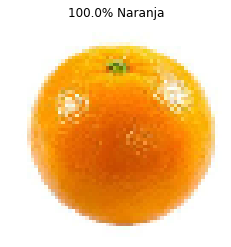

In [17]:
#Cargo archivo desde la PC
from google.colab import files
uploaded = files.upload()                                           #Subo imagen a colab
path=list(uploaded.keys())                                          #Obtengo el path de la imagen cargada

#Convierto imagen en tensor
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img('/content/'+path[0], target_size=(64, 64))    #Cargo la imagen desde colab
img_array = image.img_to_array(img)                                #La convierto a array
img_batch = np.expand_dims(img_array, axis=0)                      #La convierto a tensor

#Realizo predicion
prediction = model.predict(img_batch)                              #Obtengo la prediccion de la imagen
print (prediction)                                                 #Imprimo resultado

if prediction[0][0] > prediction[0][1]:                            #Si la mas probable que sea de la clase 1
  if prediction[0][0] > 0.8:                                       #Si la probabilidad es mayor al 80%
    name=str(prediction[0][0]*100)+"% Manzana"                     #Indico que es una manzana
  else:                                                            #Sino
    name="No es manzana ni naranja"                                #Indico que no es manzana ni naranja
else:                                                              #Si es mas probable que sea de la clase 2
  if prediction[0][1] > 0.8:                                       #Si la probabilidad es mayor al 80%
    name=str(prediction[0][1]*100)+"% Naranja"                     #Indico que es naranja
  else:                                                            #Sino
    name="No es manzana ni naranja"                                #Indico que no es manzana ni naranja

plt.imshow(img)                                                    #Muestro imagen
plt.title(name)                                                    #Imprimo titulo
plt.axis("off")
plt.show()
